## Words

Welcome to my WordGame project! In this second notebook, ...
Number of words!

First we do the usual library imports and stuff. 

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # data visualization

from subprocess import check_output
#print(check_output(["ls", "../input/wordgame"]).decode("utf8"))

# color palette for plotting
pal = sns.color_palette("Paired", 10)

Now, let's open up the dataset.

In [68]:
#df = pd.read_csv('../input/wordgame/wordgame_20170628.csv', dtype='object')
df = pd.read_csv('../data/processed/wordgame_20170721_freq.csv')

#load the alphabetical list of source names
with open('../data/processed/sources.csv') as f:
    sources_list = f.read().splitlines()

print(df.dtypes)

#print dataset dimensions
print(df.shape)

#print first 5 rows
df.head()

author        int64
word1        object
word2        object
source       object
sourceID      int64
tf          float64
tf10        float64
df            int64
pair         object
pf          float64
pf10        float64
tfidf10     float64
pfidf10     float64
dtype: object
(334036, 13)


,author,word1,word2,source,sourceID,tf,tf10,df,pair,pf,pf10,tfidf10,pfidf10
0,1353,email,spam,GOG,4,0.000033,0.000037,7,email:spam,0.000006,0.000019,0.000033,0.000017
1,1568,highlander,zweihander,GOG,4,0.000045,0.000075,8,highlander:zweihander,0.000003,0.000019,0.000061,0.000015
2,4793,dictator,decision,U2,8,0.000081,0.000166,7,dictator:decision,0.000003,0.000033,0.000148,0.000030
3,796,horse,cowboy,ECF,3,0.000760,0.000312,10,horse:cowboy,0.000015,0.000016,0.000216,0.000011
4,289,maudie,atticus,AC,0,0.000003,0.000048,1,maudie:atticus,0.000003,0.000048,0.000115,0.000115


## Word length
We are now ready to extract our first feature, which will be the word length. I do not expect any differences between NT'ers and ASD'ers, although I'm curious to what is the average length of English words. 

Longest word: 200
Longest word: 200


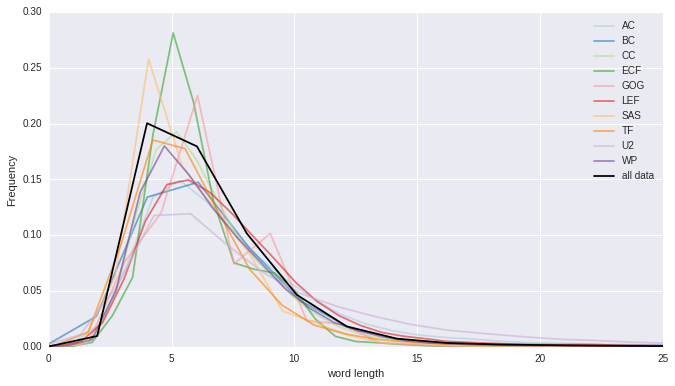

In [69]:
df['word1'] = df['word1'].astype(str)
df['word2'] = df['word2'].astype(str)
df['sourceID'] = df['sourceID'].astype(int)

df['len1'] = df['word1'].apply(lambda x:len(x))
df['len2'] = df['word2'].apply(lambda x:len(x))

print("Longest word: " +str(df['len1'].max()))
print("Longest word: " +str(df['len2'].max()))

plt.figure(figsize=(11, 6))
for i in range(0,10):
    s = df[df['sourceID']==i]
    g = sns.kdeplot(s['len1'], alpha=0.6, label=sources_list[i], color=pal[i])  
g = sns.kdeplot(df['len1'], color="black", label="all data")  
plt.xlabel('word length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([0,25])
plt.show()

english average is 5. -> ecig. 

## Word length difference
We can also look at the difference between the word lenght of word1 and word2.



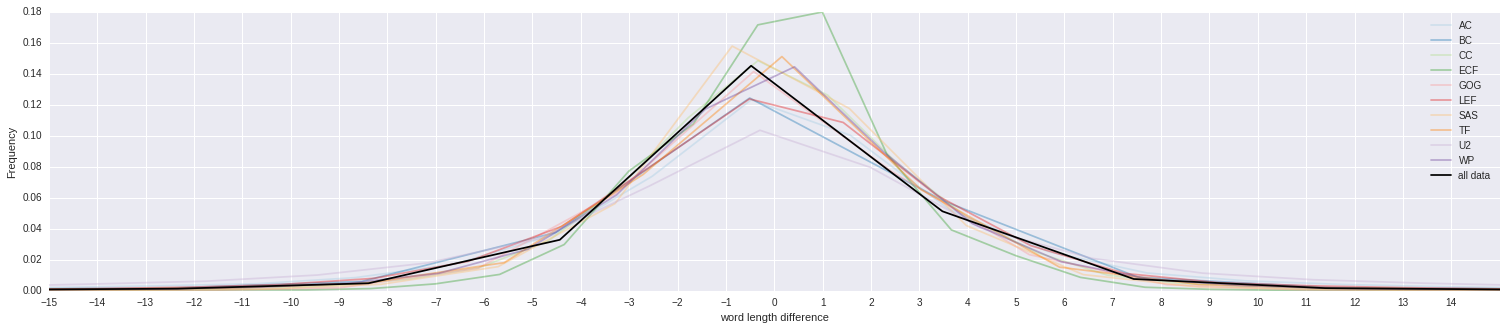

In [70]:
df['d_len'] = df['len1'] - df['len2']

plt.figure(figsize=(26, 5))
for i in range(0,10):
    s = df[df['sourceID']==i]
    g = sns.kdeplot(s['d_len'], alpha=0.4, label=sources_list[i], color=pal[i])  
g = sns.kdeplot(df['d_len'], color="black", label="all data")  
g.set(xticks=np.arange(-15,15))
plt.xlabel('word length difference')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-15,15])

'''
plt.subplot(1,2,2)
g = sns.kdeplot(df['len1'], df['len2'], shade=True)  
plt.xlabel('length word1')
plt.ylabel('length word2')
axes = plt.gca()
axes.set_xlim([1,13])
axes.set_ylim([1,13])
'''
plt.show()



:)

## Levenshtein Distance
...


Mean edit distance: 6.82767126897


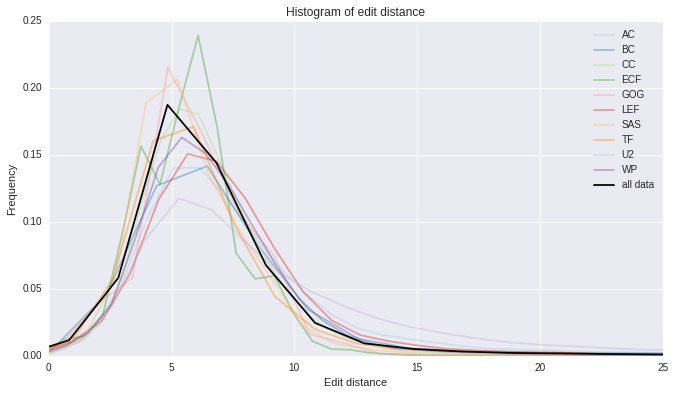

In [71]:
import Levenshtein

def levenshtein(r):
	return Levenshtein.distance(r.word1, r.word2)

#calculate levenstein distance on each row and add to dataframe
df['edit'] = df.apply(levenshtein, axis=1)

#print mean edit distance
print("Mean edit distance: "+ str(df['edit'].mean()))

#Plot
plt.figure(figsize=(11, 6))
for i in range(0,10):
    s = df[df['sourceID']==i]
    g = sns.kdeplot(s['edit'], alpha=0.4, label=sources_list[i], color=pal[i])  
g = sns.kdeplot(df['edit'], color="black", label="all data")  
plt.title('Histogram of edit distance')
plt.xlabel('Edit distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([0,25])
#axes.set_ylim([0,0.015])
plt.show()

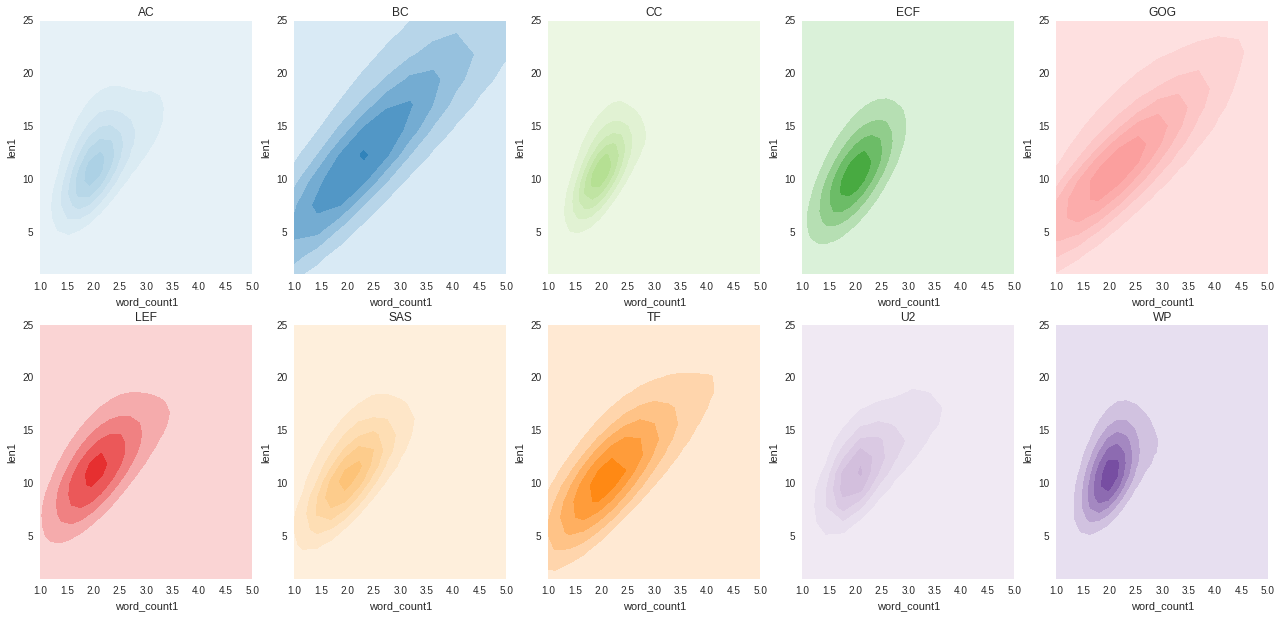

In [72]:
# compute word count
df['word_count1'] = df['word1'].apply(lambda x:(x.replace('  ',' ').count(' ')+1))

#Plot
plt.figure(figsize=(22, 10))
for i in range(0,10):
    s = df[df['sourceID']==i]
    s = s[s['word_count1']>1]
    plt.subplot(2,5,i+1)
    cmapi = sns.light_palette(pal[i], as_cmap=True)
    g = sns.kdeplot(s['word_count1'], s['len1'], n_levels=5, shade=True, cmap=cmapi)
    plt.title(sources_list[i])
    axes = plt.gca()
    axes.set_xlim([1,5])
    axes.set_ylim([1,25])
plt.show()

0.22427223413
50


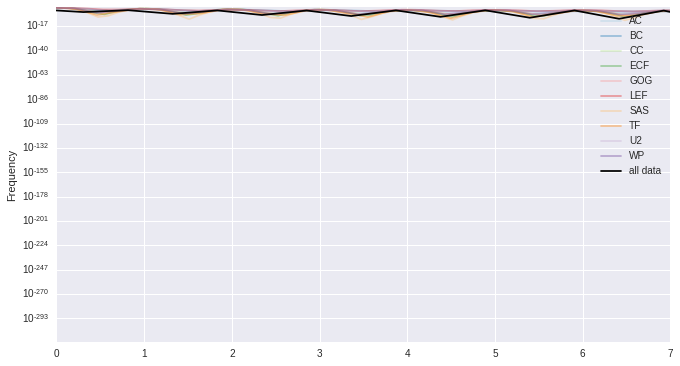

In [81]:
import os
def prefix_length(r):
    return len(os.path.commonprefix([r.word1, r.word2]))

df['prefix'] = df.apply(prefix_length, axis=1)
print(df['prefix'].mean())
print(df['prefix'].max())

#Plot
plt.figure(figsize=(11, 6))
for i in range(0,10):
    s = df[df['sourceID']==i]
    g = sns.kdeplot(s['prefix'], alpha=0.4, label=sources_list[i], color=pal[i])  
g = sns.kdeplot(df['prefix'], color="black", label="all data")  
#plt.title('Histogram of edit distance')
#plt.xlabel('Edit distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([0,7])
axes.set_yscale('log')
#axes.set_ylim([0,0.015])
plt.show()

...

# Save

In [73]:


#set output filename
outfile = "../data/processed/wordgame_20170721_freq_basic.csv"

# write rows to file
df.to_csv(outfile, sep=',', index=False)
